In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time
from os import listdir
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [72]:
def getdata(string) : 
    rpath = r"../Absorption/"
    data = np.genfromtxt(rpath+string, skip_header=1, delimiter='\t')
    l = []
    i = []
    for ar in data : 
        if(ar[0] > 380 and ar[0] < 700) :
            l.append(ar[0])
            i.append(ar[1])

    si = savgol_filter(i, 11, 2)
    imin = np.abs(np.min(si))
    nsi = list(map(lambda x: x + imin, si))
    
    return (l,nsi)

def plot() : 
    fig, ax = plt.subplots(figsize=(8,6))
    return (fig, ax)
    

['B1.txt', 'B2.txt', 'B3.txt', 'B4.txt', 'G1.txt', 'G2.txt', 'G3.txt', 'G4.txt', 'R1.txt', 'R2.txt', 'R3.txt', 'R4.txt']


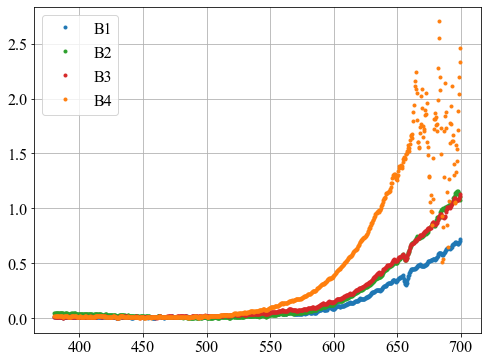

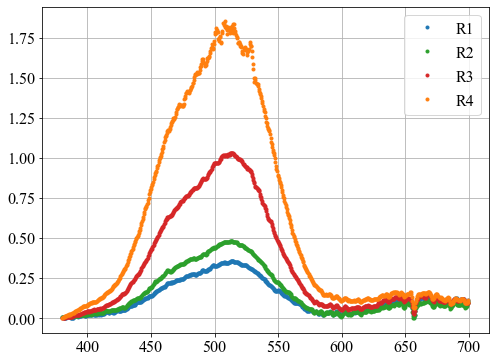

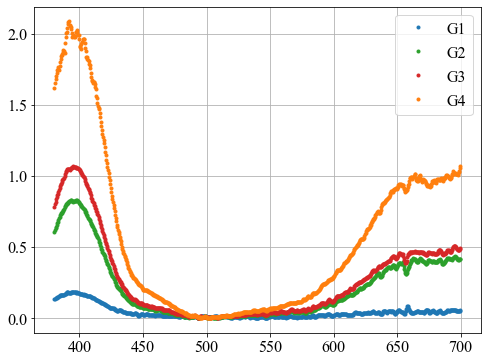

In [75]:
slist = listdir(r"../Absorption/")
print(slist)

f1, a1 = plot()
f2, a2 = plot()
f3, a3 = plot()

collist = ["tab:blue", "tab:green", "tab:red", "tab:orange"]

for name in slist : 
    if(name[0] == "B") :
        l, i = getdata(name)
        a1.plot(l, i, '.', color=collist[int(name[1])-1], label=name[0]+name[1])
    if(name[0] == "R") :
        l, i = getdata(name)
        a2.plot(l, i, '.', color=collist[int(name[1])-1], label=name[0]+name[1])
    if(name[0] == "G") :
        l, i = getdata(name)
        a3.plot(l, i, '.', color=collist[int(name[1])-1], label=name[0]+name[1])

for a in [a1, a2, a3] : 
    a.grid()
    a.legend()
        
        
    

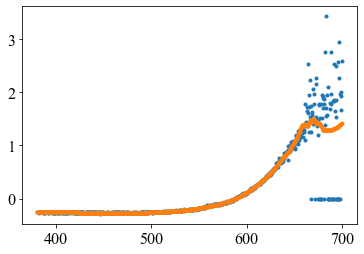

In [56]:
l, i = getdata("B4.txt")

si = savgol_filter(i, 101, 2)

plt.plot(l, i, '.')
plt.plot(l, si, '.')